# **Credit card fraud detection**

## **Context**
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## **Content**
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#importing dataset
path ='/content/drive/My Drive/Auto ML datasets/creditcard.csv'
df = pd.read_csv(path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Auto ML datasets/creditcard.csv'

In [4]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
df.isnull().values.any()

False

In [0]:
#get the fraud and normal dataset
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

In [9]:
print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

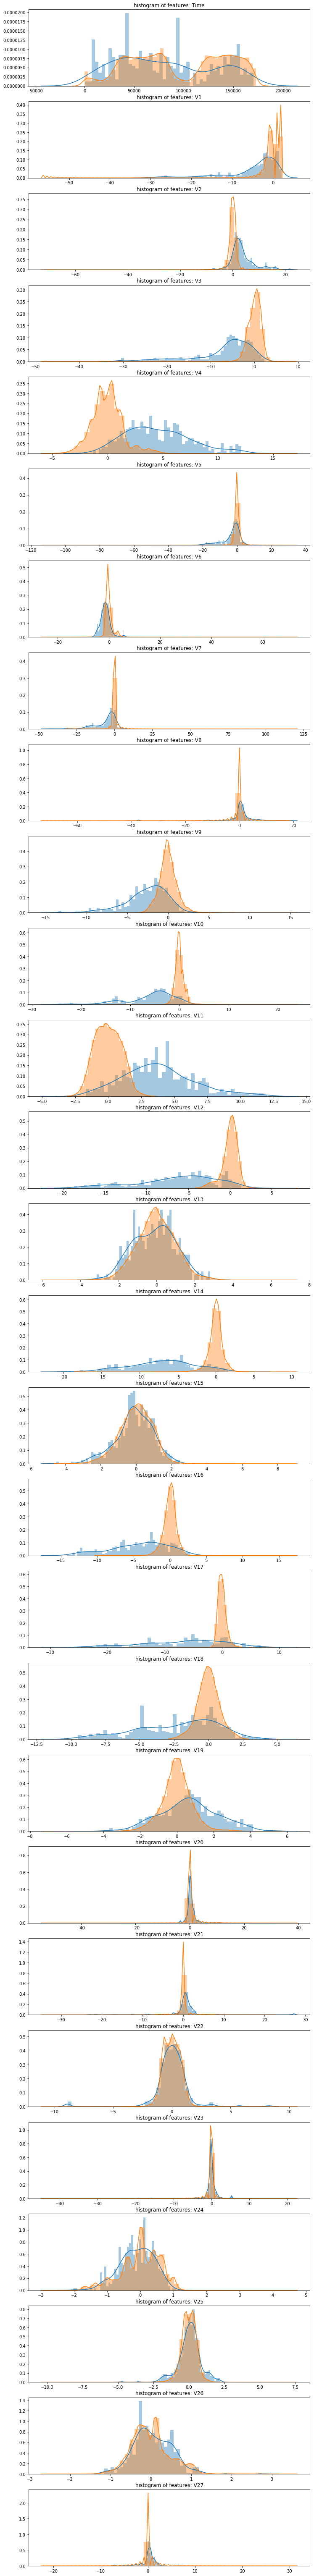

In [12]:
from matplotlib import gridspec
features = df.iloc[:, 0:28].columns

plt.figure(figsize=(12, 28*4))
gs = gridspec.GridSpec(28, 1)
for i , c in enumerate(df[features]):
  ax= plt.subplot(gs[i])
  sns.distplot(df[c][df.Class==1], bins=50)
  sns.distplot(df[c][df.Class==0], bins=50)
  ax.set_xlabel('')
  ax.set_title('histogram of features: '+ str(c))

plt.show()


In [13]:
#Take fraction of data
df1 = df.sample(frac = 0.1, random_state= 1)
df1.shape

(28481, 31)

In [14]:
df.shape

(284807, 31)

In [0]:
#fraud and valid transactions
Fraud = df1[df1['Class']==1]
Valid = df1[df1['Class']==0]
outliers= len(Fraud)/float(len(Valid))

In [16]:
print(outliers)
print('Fraud cases: {}'. format(len(Fraud)))
print('Valid cases: {}'. format(len(Valid)))



0.0017234102419808666
Fraud cases: 49
Valid cases: 28432


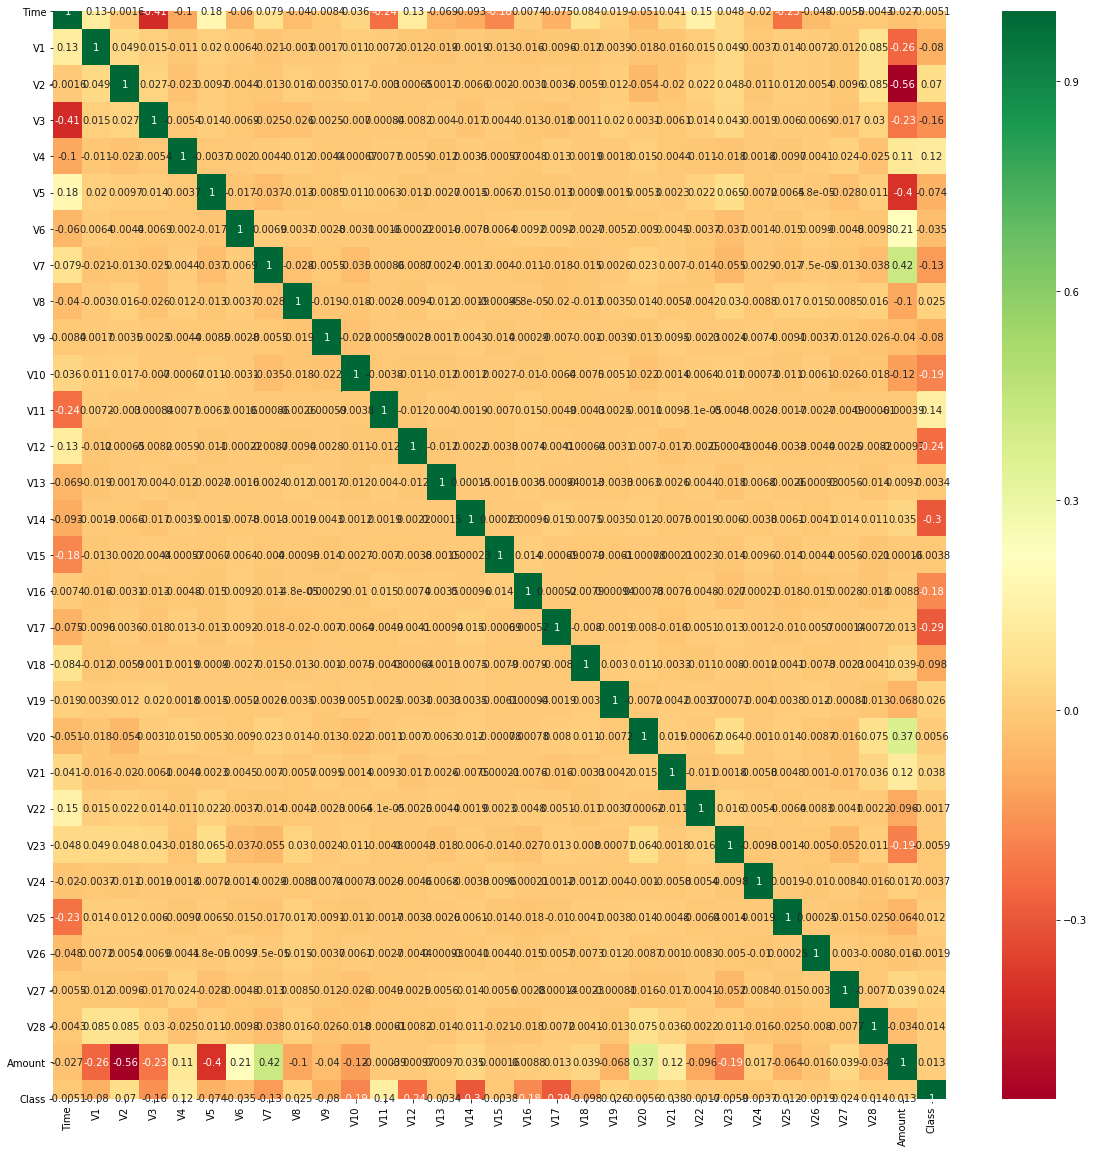

In [17]:
#correlation
corrmat = df1.corr()
top_corr_features= corrmat.index
plt.figure(figsize= (20,20))
#heat map
g= sns.heatmap(df1[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [0]:
#seperating X and Y from dataset
X= df1.drop(['Class'], axis=1)
Y= df1['Class']

X_data = X.values
Y_data = Y.values

In [19]:
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [20]:
X_data

array([[ 1.19907000e+05, -6.11711999e-01, -7.69705324e-01, ...,
         6.65013699e-02,  2.21179560e-01,  1.79000000e+00],
       [ 7.83400000e+04, -8.14681711e-01,  1.31921886e+00, ...,
         1.62427330e-01,  5.94562455e-02,  1.98000000e+00],
       [ 8.23820000e+04, -3.18193485e-01,  1.11861770e+00, ...,
         2.49049701e-01,  9.25156059e-02,  8.90000000e-01],
       ...,
       [ 3.16900000e+03, -3.15539610e-01,  1.05430314e+00, ...,
         1.94541209e-01,  1.66038832e-01,  1.96000000e+01],
       [ 9.87520000e+04, -3.58041656e+00,  4.10091605e+00, ...,
         7.85416685e-01,  3.53091883e-01,  9.20000000e-01],
       [ 6.61870000e+04,  1.21334929e+00,  2.27172159e-01, ...,
        -5.63286034e-03,  1.74000481e-02,  1.93400000e+01]])

In [21]:
Y_data

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
#split train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

## Model **Building**

In [26]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 32 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 2s (664 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontE

In [23]:
import autosklearn.classification
import sklearn.metrics

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [27]:
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task= 120, per_run_time_limit = 30)
automl.fit(X_train, Y_train)
y_pred = automl.predict(X_test)

print("Auto Sklearn accuracy", sklearn.metrics.accuracy_score(Y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-11-28 12:41:26,580:EnsembleBuilder(1):781bef5983d9c7df2782a5b1e90dcc8c] No models better than random - using Dummy Score!
[WARNING] [2019-11-28 12:41:26,594:EnsembleBuilder(1):781bef5983d9c7df2782a5b1e90dcc8c] No models better than random - using Dummy Score!
[WARNING] [2019-11-28 12:41:28,599:EnsembleBuilder(1):781bef5983d9c7df2782a5b1e90dcc8c] No models better than random - using Dummy Score!
[WARNING] [2019-11-28 12:41:30,605:EnsembleBuilder(1):781bef5983d9c7df2782a5b1e90dcc8c] No models better than random - using Dummy Score!


/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty

[WARNING] [2019-11-28 12:42:27,441:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2019-11-28 12:42:27,441:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty

1
['/tmp/autosklearn_tmp_1654_7667/.auto-sklearn/ensembles/1.0000000000.ensemble', '/tmp/autosklearn_tmp_1654_7667/.auto-sklearn/ensembles/1.0000000001.ensemble', '/tmp/autosklearn_tmp_1654_7667/.auto-sklearn/ensembles/1.0000000002.ensemble', '/tmp/autosklearn_tmp_1654_7667/.auto-sklearn/ensembles/1.0000000003.ensemble', '/tmp/autosklearn_tmp_1654_7667/.auto-sklearn/ensembles/1.0000000004.ensemble', '/tmp/autosklearn_tmp_1654_7667/.auto-sklearn/ensembles/1.0000000005.ensemble', '/tmp/autosklearn_tmp_1654_7667/.auto-sklearn/ensembles/1.0000000006.ensemble', '/tmp/autosklearn_tmp_1654_7667/.auto-sklearn/ensembles/1.0000000007.ensemble', '/tmp/autosklearn_tmp_1654_7667/.auto-sklearn/ensembles/1.0000000008.ensemble', '/tmp/autosklearn_tmp_1654_7667/.auto-sklearn/ensembles/1.0000000009.ensemble']
Auto Sklearn accuracy 0.9989468141126909


In [0]:
#Auto Sklearn accuracy 99.89468141126909

In [29]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: 781bef5983d9c7df2782a5b1e90dcc8c
  Metric: accuracy
  Best validation score: 0.999468
  Number of target algorithm runs: 21
  Number of successful target algorithm runs: 17
  Number of crashed target algorithm runs: 3
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 1



In [30]:
print(automl.show_models())

[(0.140000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'categorical_encoding:__choice__': 'no_encoding', 'classifier:__choice__': 'qda', 'imputation:strategy': 'median', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'quantile_transformer', 'classifier:qda:reg_param': 0.2123110952939471, 'rescaling:quantile_transformer:n_quantiles': 996, 'rescaling:quantile_transformer:output_distribution': 'uniform'},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.120000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'categorical_encoding:__choice__': 'one_hot_encoding', 'classifier:__choice__': 'lda', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'none', 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'True', 'classifier:lda:n_components': 27, 'classifier:lda:shrinkag